<a href="https://colab.research.google.com/github/pjprathmesh/Hierarchical-Softmax/blob/master/hierarchical_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
from keras.layers import  Input,Dense,Conv2D,MaxPool2D,GlobalAveragePooling2D,Dropout,BatchNormalization
from keras.models import Model
from keras.activations import sigmoid
from keras.utils import plot_model
import numpy as np
from keras.utils import to_categorical

inp=Input((28, 28,1))
x=Conv2D(64,(5,5),activation="relu")(inp)
x=MaxPool2D(pool_size=(2, 2),)(x)
x=BatchNormalization()(x)

x=Conv2D(128,(3,3),activation="relu")(x)
x=GlobalAveragePooling2D()(x)
x=Dropout(0.2)(x)
x1=Dense(1,"sigmoid")(x)


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 64)   1664        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 12, 12, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12, 12, 64)   256         max_pooling2d[0][0]              
_______________________________________________________________________________________

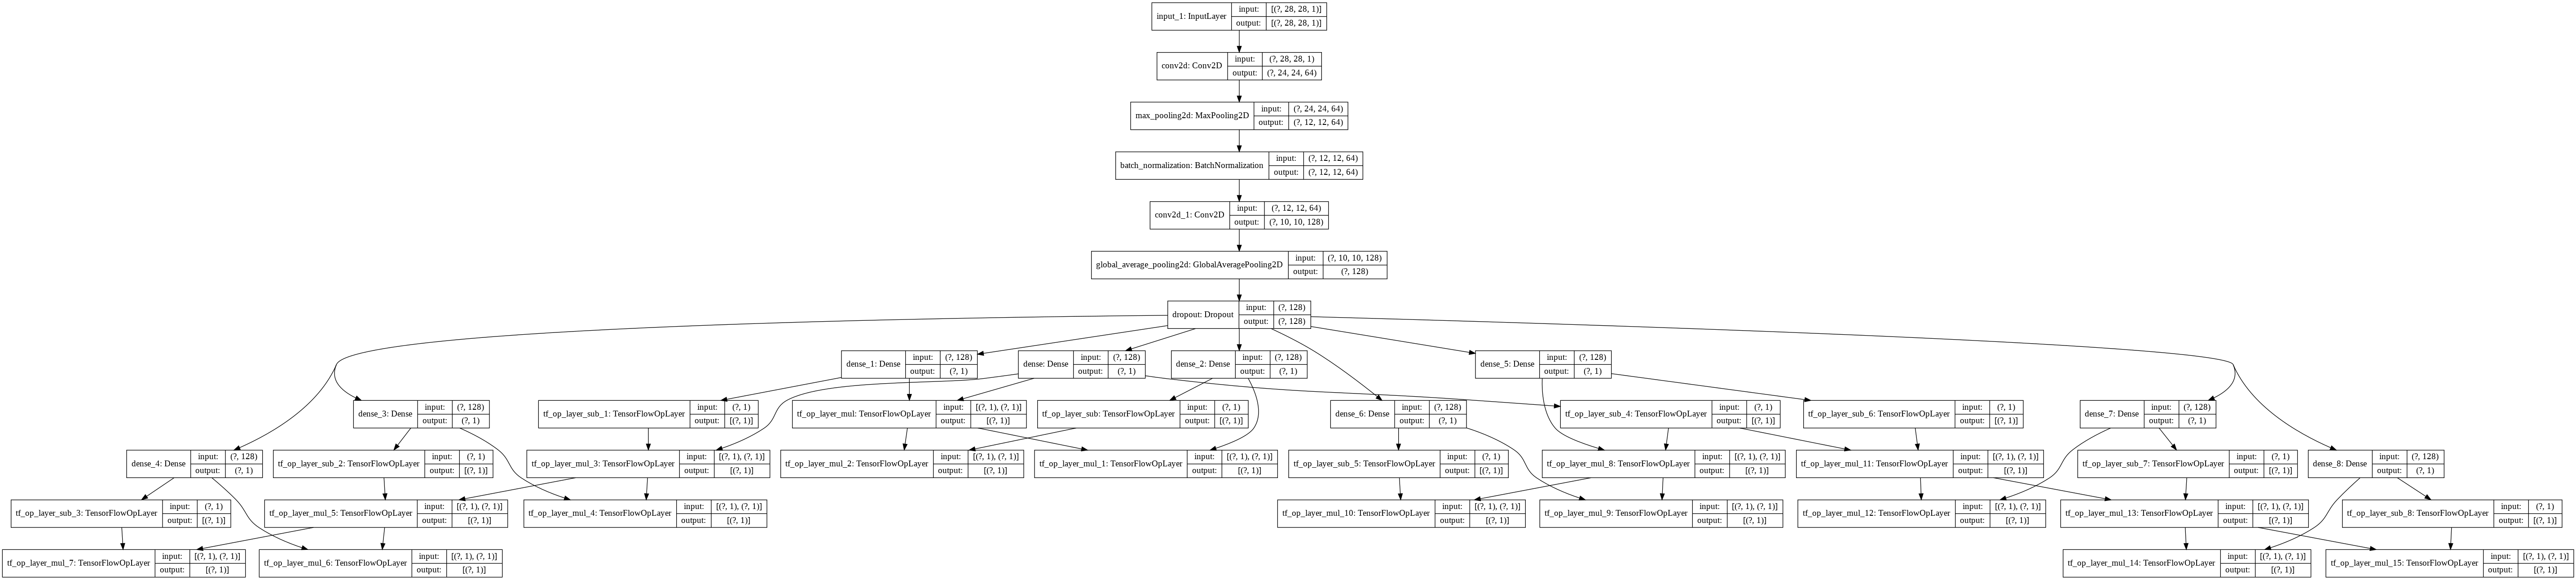

In [2]:
global l1
l1=[0,1,2,3,4,5,6,7,8,9]
y_trai=np.transpose(to_categorical(y_train,10),(1,0))
y_tes=np.transpose(to_categorical(y_test,10),(1,0))
# y_trai=[list(i) for i in y_trai]
# y_tes=[list(i) for i in y_tes]

global dens
dens=[]
global cat
cat=[]
n=len(l1)


def recur(x,list1,xx):
    length=len(list1)
    if length==1:
      
      cat.append(xx)
      return
    else:
      x1=Dense(1,"sigmoid")(x)
     
      # dens.append(x1)
      recur(x,list1[:int(length/2)],x1*xx)
      recur(x,list1[int(length/2):],(1-x1)*xx)
                                                                                                  # if x1>0.5:
                                                                                                  #   recur(x1)
                                                                                                  # else:
                                                                                                  #   recur(x1)


recur(x,l1[:int(n/2)],x1)
recur(x,l1[int(n/2):],1-x1)
model=Model([inp],cat)
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [3]:
from keras.optimizers import Adam
opt = Adam(lr=0.005,)
model.compile(opt,loss="binary_crossentropy",metrics=["acc"])
model.fit(x=x_train,y=list(y_trai),batch_size=500,epochs=100,validation_data=[x_test,list(y_tes)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
59000/60000 [============================>.] - ETA: 0s - loss: 1.1488 - tf_op_layer_mul_1_loss: 0.1200 - tf_op_layer_mul_2_loss: 0.0645 - tf_op_layer_mul_4_loss: 0.1333 - tf_op_layer_mul_6_loss: 0.1141 - tf_op_layer_mul_7_loss: 0.1059 - tf_op_layer_mul_9_loss: 0.1246 - tf_op_layer_mul_10_loss: 0.0993 - tf_op_layer_mul_12_loss: 0.1305 - tf_op_layer_mul_14_loss: 0.1244 - tf_op_layer_mul_15_loss: 0.1323 - tf_op_layer_mul_1_acc: 0.9621 - tf_op_layer_mul_2_acc: 0.9841 - tf_op_layer_mul_4_acc: 0.9520 - tf_op_layer_mul_6_acc: 0.9578 - tf_op_layer_mul_7_acc: 0.9642 - tf_op_layer_mul_9_acc: 0.9519 - tf_op_layer_mul_10_acc: 0.9655 - tf_op_layer_mul_12_acc: 0.9514 - tf_op_layer_mul_14_acc: 0.9566 - tf_op_layer_mul_15_acc: 0.9574WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be rem

In [4]:
true_value=0
false_value=0
for i in range(10000): 
  # print(model.predict(x_test[i][np.newaxis]),)
  # print(np.array(y_tes).T[i])
  
  if np.argmax(model.predict(x_test[i][np.newaxis]))==np.argmax(np.array(y_tes).T[i]):
    
    true_value+=1
  else:
    false_value+=1
print(true_value,false_value)

9809 191


In [5]:
(true_value/10000)*100

98.09